In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
import math

In [2]:
def load_image(img_path):
    
    img = Image.open(img_path).convert('L')
    img_array = np.array(img)
    
    return img_array

In [3]:
def save_image(img_array, img_path):
    
    img_array = img_array.astype(np.uint8)
    rgb_image = np.stack((img_array, ) * 3, axis = -1)
    Image.fromarray(rgb_image).save(img_path)

In [4]:
def fft(img_array):
    
    f = np.fft.fft2(img_array)
    fshift = np.fft.fftshift(f)
    
    magnitude_spectrum = np.log(np.abs(fshift) + 1)
    phase_spectrum = np.angle(fshift)
    
    return magnitude_spectrum, phase_spectrum

In [5]:
def fft_inv(magnitude_spectrum, phase_spectrum):
    
    fshift = (np.exp(magnitude_spectrum)-1) * np.exp(phase_spectrum*1j)
    fishift = np.fft.ifftshift(fshift)
    img_array = np.fft.ifft2(fishift)
    img_array = np.abs(img_array)
    
    return img_array

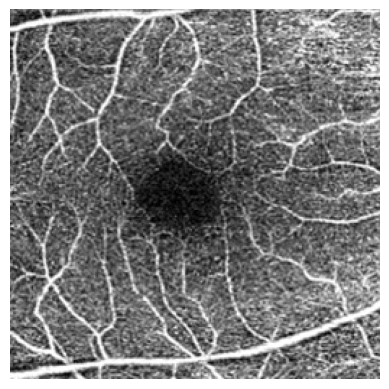

In [6]:
fig = load_image('./FedICRA-master/data/FAZ/Domain1/train/imgs/001_M_1.png')

plt.imshow(fig, cmap = 'gray')
plt.axis('off')
plt.show()

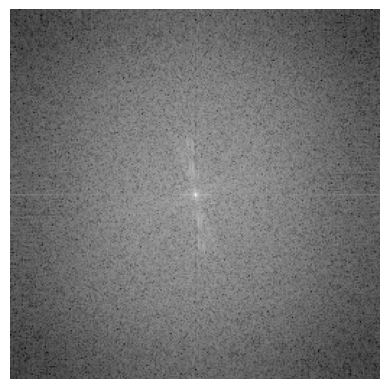

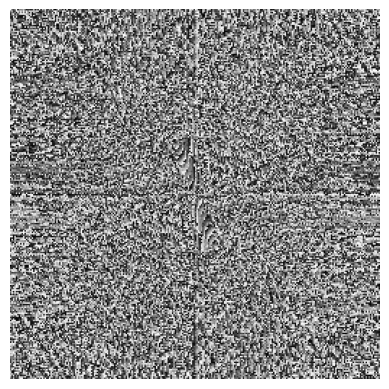

In [7]:
magnitude_spectrum, phase_spectrum = fft(fig)

plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.axis('off')
plt.show()

plt.imshow(phase_spectrum, cmap = 'gray')
plt.axis('off')
plt.show()

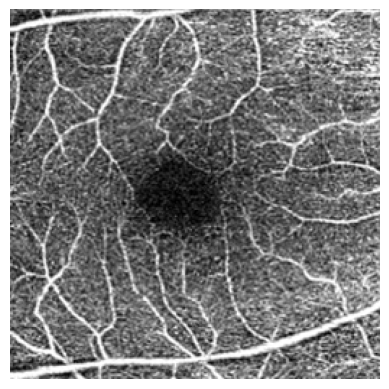

In [8]:
rfig = fft_inv(magnitude_spectrum, phase_spectrum)

plt.imshow(rfig, cmap = 'gray')
plt.axis('off')
plt.show()